In [28]:
import rosbag
from matplotlib import pyplot as plt

In [35]:
import tams_pr2_guzheng

In [36]:
bag_name = '../../../../bags/guzheng_first_episodes_all_information_to_integrate_into_PluckEpisodeV1_2022-08-26-21-58-14_extracted_episodes.bag'
bag = rosbag.Bag(bag_name)
episodes = [m for t,m,_ in bag.read_messages()]

In [37]:
len(episodes)

38

In [39]:
e = episodes[32]

In [6]:
e.length.to_sec()

2.641455412

In [7]:
e.finger

'ff'

In [8]:
e.string

'b5'

In [40]:
e.string_head_frame

header: 
  seq: 0
  stamp: 
    secs: 1661543971
    nsecs: 266395330
  frame_id: "base_footprint"
child_frame_id: "guzheng/b5/head"
transform: 
  translation: 
    x: 0.5402080416679382
    y: -0.46223196387290955
    z: 0.6464329957962036
  rotation: 
    x: 0.05895094573497772
    y: -0.07335727661848068
    z: 0.7476686239242554
    w: 0.65736985206604

In [41]:
e.finger_start_pose

header: 
  seq: 0
  stamp: 
    secs: 1661543971
    nsecs: 266395330
  frame_id: "guzheng/b5/head"
pose: 
  position: 
    x: 0.050910456952535876
    y: 0.01786191133152676
    z: 0.015314724975997174
  orientation: 
    x: 0.4952910097043915
    y: 0.5241717798473627
    z: -0.5579090165209769
    w: 0.4106924492175329

(array([ 3.,  1.,  2.,  8.,  1., 11.,  4.,  2.,  2.,  4.]),
 array([1.87420964, 1.9539551 , 2.03370056, 2.11344602, 2.19319148,
        2.27293694, 2.3526824 , 2.43242786, 2.51217332, 2.59191878,
        2.67166424]),
 <BarContainer object of 10 artists>)

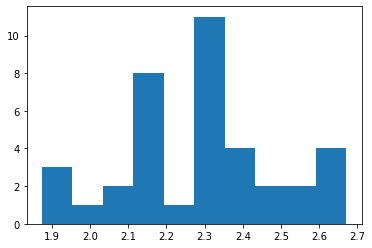

In [9]:
plt.hist([e.length.to_sec() for e in episodes])

In [10]:
[(e.string, e.id) for e in episodes]

[('d6', 599235856),
 ('b5', 65697952),
 ('d6', 855979139),
 ('b5', 113559837),
 ('d6', 1015044858),
 ('d6', 906222554),
 ('', 964828414),
 ('b5', 21503047),
 ('d6', 112591611),
 ('b5', 155976116),
 ('d6', 1065450916),
 ('b5', 141757338),
 ('b5', 732154461),
 ('', 699133886),
 ('d6', 523145139),
 ('b5', 821061030),
 ('d6', 436915602),
 ('b5', 815563688),
 ('d6', 59071215),
 ('b5', 557591075),
 ('d6', 41012469),
 ('b5', 911745164),
 ('d6', 356956803),
 ('b5', 562887827),
 ('d6', 267573591),
 ('b5', 938742041),
 ('d6', 720519654),
 ('b5', 739770714),
 ('d6', 747123066),
 ('d6', 665007230),
 ('', 535265409),
 ('b5', 850502947),
 ('b5', 659428186),
 ('', 875555252),
 ('d6', 416079636),
 ('b5', 172029424),
 ('d6', 549514374),
 ('b5', 924095693)]

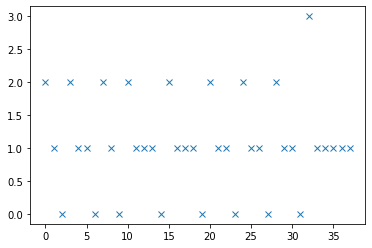

In [11]:
plt.plot([len(e.detected_audio_onsets) for e in episodes], 'x')

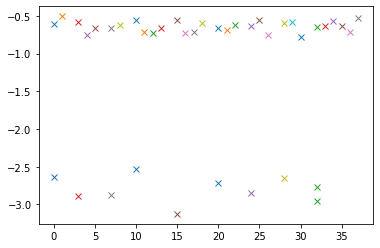

In [12]:
i = 0
plt.figure()
for e in episodes:
    onsets = []
    for o in e.detected_audio_onsets:
        onsets.append((o.header.stamp - e.header.stamp).to_sec())
    plt.plot([i] * len(onsets), onsets, 'x')
    i+= 1

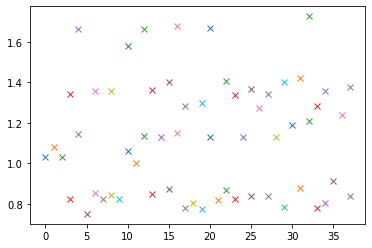

In [13]:
i = 0
plt.figure()
for e in episodes:
    onsets = []
    for o in e.detected_tactile_plucks:
        onsets.append((o - e.header.stamp).to_sec())
    plt.plot([i] * len(onsets), onsets, 'x')
    i+= 1

(array([16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 22.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

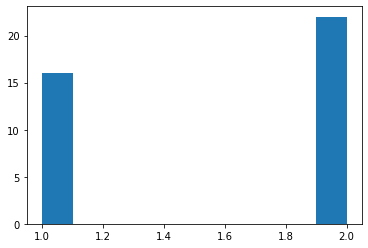

In [14]:
plt.hist([len(e.detected_tactile_plucks) for e in episodes])

In [15]:
two_tactile_plucks= [e for e in episodes if len(e.detected_tactile_plucks) == 2]

(array([4., 7., 5., 4., 1., 0., 0., 0., 0., 1.]),
 array([0.506, 0.517, 0.528, 0.539, 0.55 , 0.561, 0.572, 0.583, 0.594,
        0.605, 0.616]),
 <BarContainer object of 10 artists>)

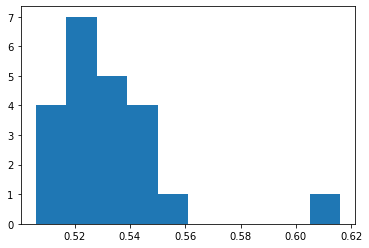

In [16]:
plt.hist([(e.detected_tactile_plucks[1]-e.detected_tactile_plucks[0]).to_sec() for e in two_tactile_plucks])

In [17]:
e= two_tactile_plucks[5]

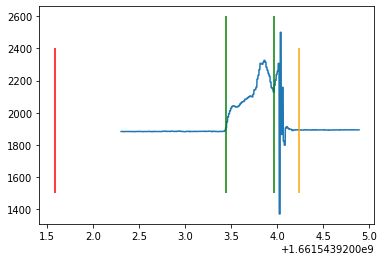

In [27]:
### ARGH, the audio onsets came in too late and are wrongly associated,
### ARGH2, the tactile pluck detector is garbage with the current thresholds

plt.figure()
plt.plot([t.header.stamp.to_sec() for t in e.tactile_data],[t.tactile.pdc for t in e.tactile_data])
plt.vlines([o.header.stamp.to_sec() for o in e.detected_audio_onsets], 1500, 2400, 'red')
plt.vlines([o.to_sec() for o in e.detected_tactile_plucks], 1500, 2600, 'green')

nxt_e = episodes[next(idx for idx, e2 in enumerate(episodes) if e2.id == e.id)+1]
plt.vlines([o.header.stamp.to_sec() for o in nxt_e.detected_audio_onsets], 1500, 2400, 'orange')


In [26]:
(e.start_state.header.stamp-e.header.stamp).to_sec()

-0.016829293999999995

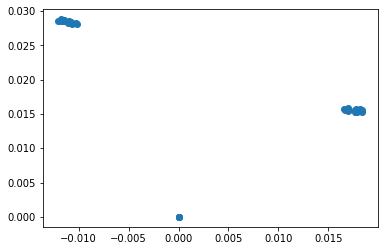

In [42]:
fps= [e.finger_start_pose.pose for e in episodes]
plt.scatter([f.position.y for f in fps], [f.position.z for f in fps])

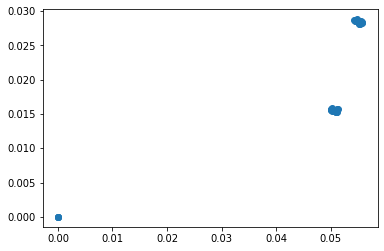

In [43]:
plt.scatter([f.position.x for f in fps], [f.position.z for f in fps])